# **Exploração e análise de dados de crédito com SQL**

## **Os dados:**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade cliente;
* sexo = sexo cliente (F ou M);
* dependentes = número de dependentes do cliente;
* escolaridade = grau de escolaridade do cliente;
* estado_civil = estado civel do cliente (Solteiro ou Casado);
* salário_anual = faixa salarial do cliente;
* tipo_cartão = categoria do cartão do cliente;
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* qtd_iteração = quantidade de iterações/transações nos últimos 12 meses:
* meses_inativos_12m = quantidade de meses que o cliente ficou inativo nos últimos 12 meses;
* limite_crédito = limite de crédito do cliente;
* valor_transações_12m = últimos 12 meses = valor das transações dos últimos 12 meses;
* qte_transações_12m = quantidade de transações dos últimos 12 meses.

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: 

## **Exploração dos dados:**

Nesta primeira fase vamos explorar os dados para entender como eles se compõem.

**Entendendo a quantidade de dados disponíveis:**

Query: SELECT COUNT(*) FROM credito
> Resposta: 2564 linhas

**Como são os dados:**

Query: SELECT * FROM credito LIMIT 10;
![10_primeiras_linhas](https://github.com/dcrb11/ebac-sql-dataset/blob/main/select_limit_10.png?raw=true)

**ps.:** A base de dados acima contém mais linhas do que a seleção utilizada. Para conhecer os dados podemos utilizar todas as linhas ou considerar apenas uma fração deles. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise, mas existem limites computacionais e financeiros na qual a redução de dados para esta análise se torna mais interessante.

**Os tipos de cada dados:**

Query: DESCRIBE credito

![tipos_dados](https://github.com/dcrb11/ebac-sql-dataset/blob/main/tipos_dados.png?raw=true)

Entendido quais os tipos de dados, podemos observar mais atentamente as variáveis que não são numéricas, disponíveis no dataset:

**Sexo:**

Query: SELECT DISTINCT sexo FROM credito

![sexo](https://github.com/dcrb11/ebac-sql-dataset/blob/main/sexo.png?raw=true)

**Escolaridade:**
Query: SELECT DISTINCT escolaridade FROM credito

![escolaridade](https://github.com/dcrb11/ebac-sql-dataset/blob/main/escolaridade.png?raw=true)

> Os dados demonstram vários tipos de escolaridade incluindo valores nulos, que serão tratados mais adiante.

**Estado civil:**
Query: SELECT DISTINCT estado_civil FROM credito

![estado_civil](https://github.com/dcrb11/ebac-sql-dataset/blob/main/estado_civil.png?raw=true)

> Os dados demonstram novamnte a existência de dados nulos, que serão tratados mais adiante.

**Salário anual:**
Query: SELECT DISTINCT salario_anual FROM credito

![salário_anual](https://github.com/dcrb11/ebac-sql-dataset/blob/main/salario_anual.png?raw=true)

> Os dados demonstram que os salários são apresentados em faixa salarial e não em valores exatos. Aqui também é possível notar a existência de valores nulos.

**Tipos de cartão:**
Query: SELECT DISTINCT tipo_cartao FROM credito

![tipos_de_cartão](https://github.com/dcrb11/ebac-sql-dataset/blob/main/tipo_cartao.png?raw=true)

> Aqui não há dados nulos, o que ssignifica que não terão dados a serem tratados mais adiante.

## **Análise dos dados:**

Uma vez explorados os dados e entendido quais são as informações que temos no nosso banco de dados, poderemos analisar e correlacionar essas informações na busca por um melhor entendimento do que estes dados nos contam:

**Qual a quantidade de clientes por faixa salarial?**

Query: select count(*), salario_anual from credito group by salario_anual

![clientes_salario_anual](https://github.com/dcrb11/ebac-sql-dataset/blob/main/clientes_salario_anual.png?raw=true)

> A maioria dos clientes desta base possui renda inferior a 40k, enquanto que a minoria possui renda acima de 120k. Representados por **"na"** temos 235 clientes que não informaram ou não consta faixa salarial.

**Para melhor compreensão do perfil destes clientes, quantos clientes nesse banco são do sexo feminino e quantos são do sexo masculino?**

Query: select count(*), sexo from credito group by sexo

![qte_sexo](https://github.com/dcrb11/ebac-sql-dataset/blob/main/qtd_sexo.png?raw=true)

> Podemos perceber que neste banco os dados apresentam mais clientes homens do que clientes mulheres. À partir destes dados é possível gerar um gráfico pizza para melhor compreensão da proporção masculino/ feminino.

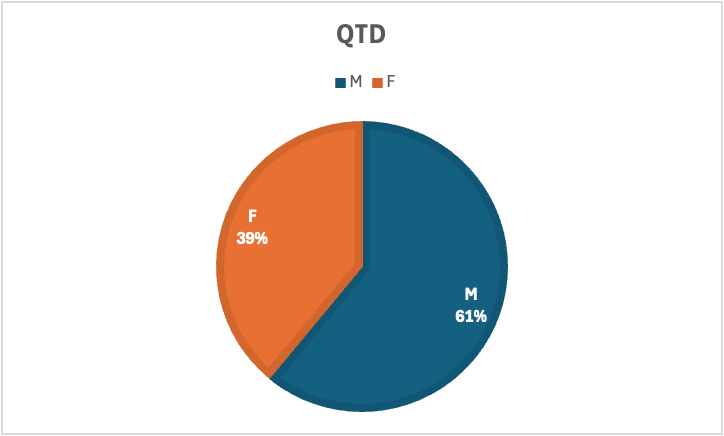

**Ainda em relação a compreensão do perfil destes clientes, quais as características dos clientes que possuem os maiores créditos?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo 
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by  escolaridade, tipo_cartao, sexo 
order by limite_credito desc
limit 10

![escolaridade_cartao](https://github.com/dcrb11/ebac-sql-dataset/blob/main/escolaridade_cartao.png?raw=true)

> Não parece haver um impacto direto da escolaridade no limite de crédito oferecido pelo banco, o limite de crédito mais alto é oferecido para um homem sem educação formal, enquanto que para mulheres o limite mais alto é oferecido para aquela com maior nível de educação. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Com base na quantidade de clientes por faixa salarial, como seria a relação faixa salarial vs. sexo?**

Query: select count(*), salario_anual, sexo from credito group by salario_anual, sexo

![salario_anual x sexo](https://github.com/dcrb11/ebac-sql-dataset/blob/main/salario_anual_sexo.png?raw=true)

> É possível notar uma maior concentração de renda entre clientes homens do que em clientes mulheres, sendo que existem 211 clientes do sexo feminino que não informaram ou não consta valores na faixa salarial, enquanto que apenas 24 são do sexo masculino, .

> Podemos perceber também que entre as mulheres que informaram suas rendas, a maior concentração está em mulheres com renda inferior a 40k, enquanto que entre homens este número é minoria.

**A idade desses clientes é fator relevante?**

Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

![idade](https://github.com/dcrb11/ebac-sql-dataset/blob/main/idade.png?raw=true)

> Não foi possível extrair nenhuma informação relevante nesta análise e não existe informação relevante em relação a idade x sexo, pois as idades mínimas são as mesmas e as idades máximas são semelhantes nos dois sexos.

**Qual seria a relação limite de crédito em relação a renda desses clientes?**

Query: select max(limite_credito) as limite_credito, sexo, salario_anual 
from credito
group by  sexo, salario_anual 
order by limite_credito desc
limit 10

![limite_renda](https://github.com/dcrb11/ebac-sql-dataset/blob/main/limite_renda.png?raw=true)

> É possível perceber que os maiores limites de crédito sobre o salário anual estão na faixa de salário anual entre 60k - 120k para homens, já para mulheres esse limite é ofertado na faixa de salários não informados e/ou sem faixa salarial representados por **"na"**, o que neste caso não nos dá muita informação para maior entendimento.

**E qual seria a relação tipo de cartão e renda para os clientes com menores limites de crédito?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo, salario_anual 
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by  escolaridade, tipo_cartao, sexo, salario_anual 
order by limite_credito asc
limit 10

![limite_maior](https://github.com/dcrb11/ebac-sql-dataset/blob/main/escolaridade_lim_min.png?raw=true)

> Aqui é possível perceber que há impacto direto em relação a renda vs. limite de crédito e tipo de cartão, mas não há esta relação com a escolaridade, a sua maioria tem renda menor que 40k, possuí cartão blue e limite de crédito inferior a 9,8k. Nota-se que as mulheres são grande maioria nestes limites de crédito menores, enquanto os homens grande maioria nos limites de crédito mais elevados.

**Em relação aos gastos, será que existe correlação entre maiores gastos vs. maiores limites de crédito? E em relação ao sexo?**

Query: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, max(limite_credito) as limite_credito, sexo 
 from credito 
 group by sexo
 order by limite_credito
 limit 10

![gastos](https://github.com/dcrb11/ebac-sql-dataset/blob/main/gastos.png?raw=true)

> É possível notar que tanto para homens quanto para mulheres com limites de crédito similares, há também gastos similares.


## **Conclusão:**

Estes são alguns **insights** obtidos após análises extraídas deste dataset de crédito:
    
- a maioria dos clientes possui renda até 40k, enquanto que sua minoria apresenta renda acima de 120k;
- os clientes do sexo masculino são maioria neste banco;
- os maiores limites de crédito estão na faixa de salário anual entre 60k - 120k e nesta categoria não há mulheres;
- a escolaridade não parece influenciar nos maiores limites de crédito oferecidos e o tipo de cartão também não parece ter influência direta nestes limites;
- a maior concentração de renda vs. faixa salarial é masculina na faixa acima de 60k, enquanto que a maior concentração de mulheres está em renda inferior a 40k;
- clientes do sexo masculino são a grande maioria com os maiores limites de crédito;
- enquanto que clientes mulheres em sua maioria estão nos limites de créditos menores, abaixo de 9k, o que vai de acordo com rendas também menores, menor que 40k.
    
    **É possível ter uma maior exploração dos dados para entender o porquê de clientes mulheres possuírem acesso a menores créditos, mas também podemos concluir que o perfil estrutural e de cultura da sociedade vai de encontro com esses dados.**

